In [1]:
# Rappel de la question : "Quel porte l'autre gardien me dirait de ne pas prendre?"

In [2]:
# Step 1 : importation des modules de base

In [3]:
import numpy as np

In [4]:
from qiskit import *

In [5]:
# Step 2 : création du circuit quantique

In [6]:
# création d'un nouveau circuit quantique avec 3 Qubits : 1er Qubit ("q0") représentant le gardien de droite, 2ème
# Qubit ("q1") représentant le gardien de gauche, 3ème Qubit ("q2") représentant la "ligne du mensonge"

In [7]:
circ = QuantumCircuit(3)

In [8]:
# affichage du circuit

In [9]:
circ.draw()

q_0: 
     
q_1: 
     
q_2:

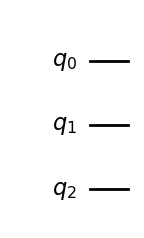

In [10]:
circ.draw("mpl")

In [11]:
# Step 3 : création du "pré-bloc" => position aléatoire du trésor et intrication des Qubits des gardiens

In [12]:
# Afin de placer le trésor de manière aléatoire, on applique une porte Hadamard (h) au Qubit ("q0") du
# gardien de droite afin de placer le Qubit en superposition d'état, suivie d'une porte C-NOT/Contrôle-NOT du 
# gardien de droite (Qubit "q0") au gardien de gauche (Qubit "q1") afin de s'assurer que les deux gardiens 
# connaissent la même information

In [13]:
circ.h(0)

In [14]:
circ.cx(0, 1)

In [15]:
# on affiche le circuit à ce stade

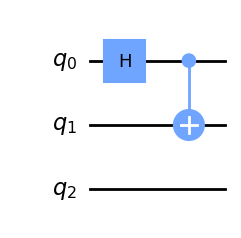

In [16]:
circ.draw("mpl")

In [17]:
# a ce stade, la situation où le trésor se trouve à droite et celle où le tésor se trouve à gauche sont superposées
# Les Qubits "q0" et "q1" se trouvent à la fois dans l'état "00" et "11"
# si on mesurait ces Qubits, cad si on posait la question "derrière quelle porte se trouve le trésor?", les deux
# gardiens donneraient la même réponse, les deux Qubits ("q0" et "q1") sont intriqués

In [18]:
# Step 4 : création du bloc 1 => "ligne du mensonge" et inversion des réponses des gardiens

In [19]:
# Step 5 : introduction de la "ligne du mensonge" pour inverser ou non les réponses des gardiens

In [20]:
# Un des deux gardiens ment, il faut donc introduire la "ligne du mensonge", représentée par le Qubit "q2"
# Si le Qubit "q2" représentant la "ligne du mensonge" est à l'état "1", le gardien de gauche (Qubit "q1") ment

In [21]:
# dans le cas où le gardien de gauche (Qubit "q1") ment, on inverse sa réponse
# pour inverser la réponse du gardien de gauche, on applique une porte C-NOT/Contrôle-NOT de la "ligne du
# mensonge" (Qubit "q2") au gardien de gauche (Qubit "q1")

In [22]:
circ.cx(2, 1)

In [23]:
# on affiche le circuit à ce stade

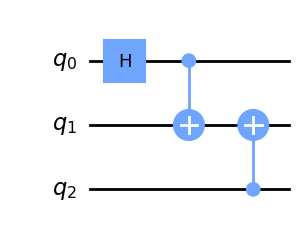

In [24]:
circ.draw("mpl")

In [25]:
# dans le cas où le gardien de droite (Qubit "q0") ment, on inverse la réponse du gardien de droite

In [26]:
# rappel : lorsque le gardien de droite ment, le Qubit "q2" représentant la "ligne du mensonge" est à l'état "0"
# rappel N°2 : dans le cas d'une porte C-NOT/Contrôle-NOT, s'il on souhaite appliquer une porte X/NOT au Qubit cible,
# alors il faut que le Qubit de contrôle soit à l'état "1"
# ainsi, pour modifier (inverser) la réponse du gardien de droite, il faut préalablement appliquer une porte X/NOT 
# au Qubit "q2" afin de le faire passer de l'état "0" à l'état "1".

In [27]:
circ.x(2)

In [28]:
# on affiche le circuit pour vérifier que la porte X/NOT a bien été appliquée au Qubit "q2"

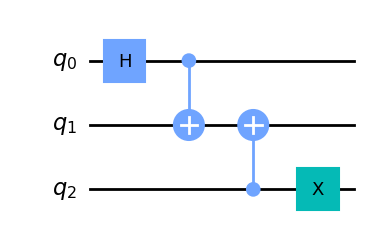

In [29]:
circ.draw("mpl")

In [30]:
# une fois le Qubit "q2" revenu à l'état "1" grâce à l'application d'une porte X/NOT sur ce dernier, on peut 
# appliquer une porte C-NOT/Contrôle NOT au gardien de droite (Qubit "q0") afin de modifier/inverser sa réponse

In [31]:
circ.cx(2, 0)

In [32]:
# on affiche le circuit pour vérifier que la porte C-NOT/Contrôle-NOT a bien été appliquée au Qubit "q0"

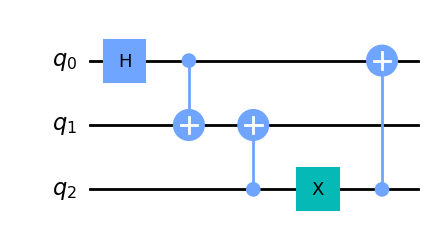

In [33]:
circ.draw("mpl")

In [34]:
# enfin, pour récupérer l'état "d'origine" du Qubit "q2" représentant la "ligne du mensonge", on lui applique de 
# nouveau une porte X/NOT afin de faire repasser l'état du Qbit de "1" à "0"

In [35]:
circ.x(2)

In [36]:
# on affiche de nouveau le circuit

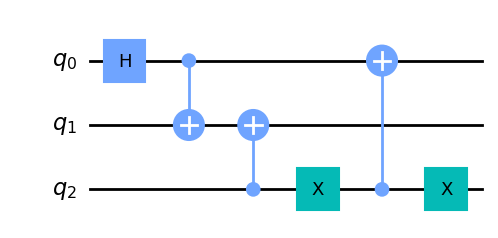

In [37]:
circ.draw("mpl")

In [38]:
# on ajoute ensuite une porte Hadamard (h) à la "ligne du mensonge" (Qubit "q2") afin de placer les deux possibilités
# ("0" ou "1") de ce Qubit en superposition d'état
# ainsi, la probabilité d'obtenir un état "0" ou un état "1" pour le Qubit "q2" est de 50%
# => il y aura donc 50% de chances que chaque gardien mente ou dise la vérité

In [39]:
circ.h(2)

In [40]:
# à ce stade, si on interrogeait les deux gardiens en posant la question : "derrière quelle porte se trouve le 
# trésor?", les deux gardiens auraient des réponses opposées

In [41]:
# Step 6 : création du bloc 2 => question => "quelle porte l'autre gardien me dirait de ne pas prendre?"

In [42]:
# il faut représenter la condition => "que me dirait l'autre gardien si?"
# pour cela on va appliquer une porte "Swap" entre les gardiens de droite (Qubit "q0") et de gauche (Qubit "q1")

In [43]:
circ.swap(0, 1)

In [44]:
# on affiche le circuit pour vérifier l'application de la porte Swap

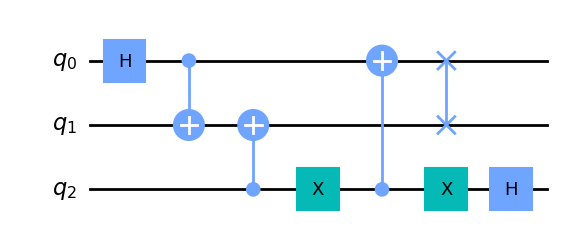

In [45]:
circ.draw("mpl")

In [46]:
# comme nous demandons aux gardiens de "ne pas prendre", il faut ajouter une porte X/NOT sur les Qubits "q0" et "q1"
# (gardiens de gauche et de droite)

In [47]:
circ.x(0)

In [48]:
circ.x(1)

In [49]:
# on affiche de nouveau le circuit pour vérifier les modifications 

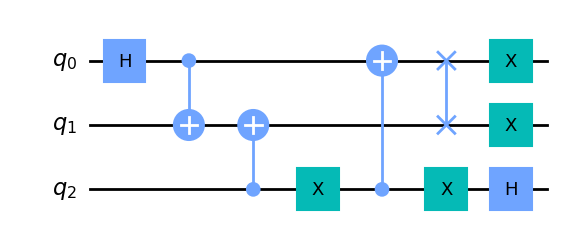

In [50]:
circ.draw("mpl")

In [51]:
# comme l'un des deux gardiens ment sur la réponse de l'autre gardien, il faut ainsi ré-appliquer la "ligne du 
# mensonge" en utilisant la même série de portes que précédemment

In [52]:
# on commence donc par appliquer de nouveau une porte C-NOT/Contrôle-NOT de la "ligne du mensonge" (Qubit "q2") au 
# gardien de gauche (Qubit "q1") afin d'inverser la réponse du gardien de gauche

In [53]:
circ.cx(2, 1)

In [54]:
# on affiche le circuit pour vérifier les modifications 

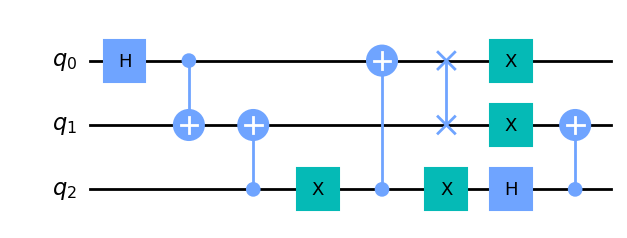

In [55]:
circ.draw("mpl")

In [56]:
# puis on applique également une porte X/NOT au Qubit "q2" afin de le faire passer de l'état "0" à l'état "1".

In [57]:
circ.x(2)

In [58]:
# une fois le Qubit "q2" revenu à l'état "1" grâce à l'application d'une porte X/NOT sur ce dernier, on peut 
# appliquer une porte C-NOT/Contrôle NOT au gardien de droite (Qubit "q0") afin de modifier/inverser sa réponse

In [59]:
circ.cx(2,0)

In [60]:
# enfin, pour récupérer l'état "d'origine" du Qubit "q2" représentant la "ligne du mensonge", on lui applique de 
# nouveau une porte X/NOT afin de faire repasser l'état du Qbit de "1" à "0"

In [61]:
circ.x(2)

In [62]:
# on affiche le circuit pour vérifier l'application des modifications

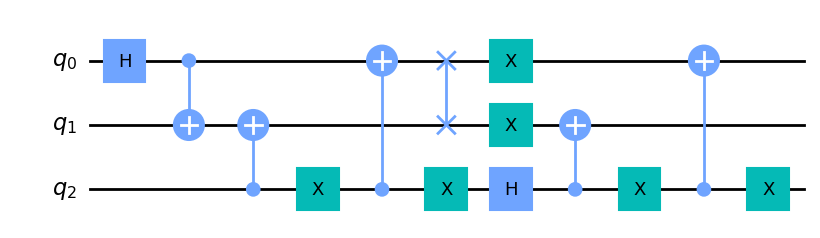

In [63]:
circ.draw("mpl")

In [64]:
# Step 7 : test du circuit quantique et affichage des quatres possibilités du système selon les propositions
# suivantes : 
# => 1 : "le trésor est à droite et le gardien de droite ment", 
# => 2 : "le trésor est à gauche et le gardien de droite ment", 
# => 3 : "le trésor est à droite et le gardien de gauche ment",
# => 4 : "le trésor est à gauche et le gardien de gauche ment",

In [65]:
# utilisation d'un simulateur quantique avec import du module Aer

In [66]:
from qiskit import Aer

In [67]:
# création du moteur de calcul

In [68]:
backend = Aer.get_backend('statevector_simulator') 

In [69]:
# lancement du calcul quantique

In [70]:
job = backend.run(circ)

In [71]:
# affichage standard du résultat

In [72]:
result = job.result()

In [73]:
# le résultat sera présenté sous forme de vecteurs d'états

In [74]:
outputstate = result.get_statevector(circ, decimals = 3)

In [75]:
print(outputstate)

Statevector([0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j,
             0.5+0.j],
            dims=(2, 2, 2))


In [76]:
# affichage du résultat sous forme d'histogramme

In [77]:
# import du module de visualisation

In [78]:
from qiskit.visualization import plot_state_city

In [79]:
# affichage du résultat

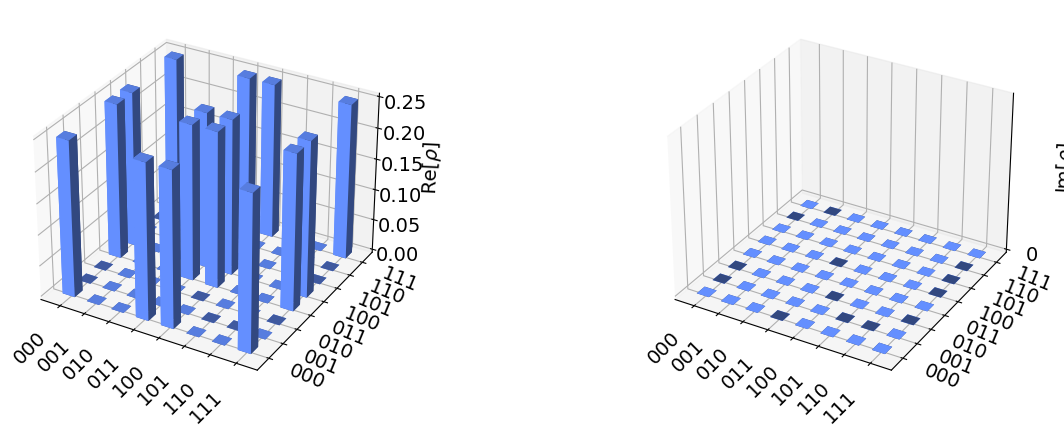

In [80]:
plot_state_city(outputstate)

In [81]:
# affichage du résultat sous forme de qsphère

In [82]:
from qiskit.visualization import plot_state_qsphere


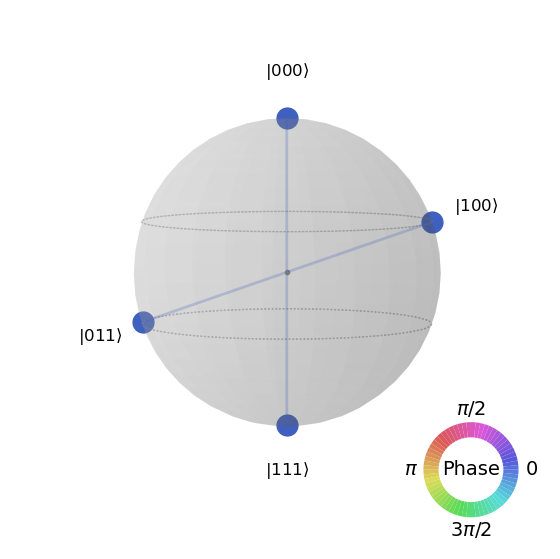

In [83]:
plot_state_qsphere(outputstate)

In [84]:
# conclusion

In [85]:
# les quatres possibilités du système sont ici représentées :
# => 1 : "le trésor est à droite et le gardien de droite ment" => 000
# => 2 : "le trésor est à gauche et le gardien de droite ment" => 011
# => 3 : "le trésor est à droite et le gardien de gauche ment" => 100
# => 4 : "le trésor est à gauche et le gardien de gauche ment" => 111

In [86]:
# explications des résultats : 
# => 1 => 000 => notation de gauche à droite pour les résultats => 
# "0": comme le gardien de droite ment, le Qbit "q2" représentant la "ligne du mensonge" est à l'état "0"
# "0": le gardien de gauche sait que le gardien de droite ment et réponds donc que le gardien de droite dirait de 
# ne pas prendre la porte de droite
# "0": le gardien de droite ment et réponds donc que le gardien de gauche dirait de ne pas prendre la porte de 
# droite

In [87]:
# => 2 => 011 => notation de gauche à droite pour les résultats => 
# "0": comme le gardien de droite ment, le Qbit "q2" représentant la "ligne du mensonge" est à l'état "0"
# "1": le gardien de gauche sait que le gardien de droite ment et réponds donc que le gardien de droite dirait de 
# ne pas prendre la porte de gauche
# "1": le gardien de droite ment et réponds donc que le gardien de gauche dirait de ne pas prendre la porte de 
# gauche

In [88]:
# => 3 => 100 => notation de gauche à droite pour les résultats => 
# "1": comme le gardien de gauche ment, le Qbit "q2" représentant la "ligne du mensonge" est à l'état "1"
# "0": le gardien de gauche ment et réponds donc que le gardien de droite dirait de ne pas prendre la porte de 
# droite
# "0": le gardien de droite sait que le gardien de gauche ment et réponds donc que le gardien de gauche dirait 
# de ne pas prendre la porte de droite

In [89]:
# => 4 => 111 => notation de gauche à droite pour les résultats => 
# "1": comme le gardien de gauche ment, le Qbit "q2" représentant la "ligne du mensonge" est à l'état "1"
# "1": le gardien de gauche ment et réponds donc que le gardien de droite dirait de ne pas prendre la porte de 
# gauche
# "1": le gardien de droite sait que le gardien de gauche ment et réponds donc que le gardien de gauche dirait de 
# ne pas prendre la porte de gauche

In [90]:
# on mesure les valeurs des trois Qubits grâce à la méthode "measure_all"

In [91]:
circ.measure_all()

In [92]:
# on affiche le circuit avec les mesures des trois Qubits

In [93]:
circ.draw("mpl")

In [101]:
# on affiche le dictionnaire sous forme d'histogramme, avec les probabilités existantes pour chaque possibilité 
# du système

In [102]:
counts = result.get_counts()

In [103]:
# on importe les dépendances de visualisation

In [104]:
from qiskit.visualization import plot_histogram

In [105]:
# on affiche l'histogramme

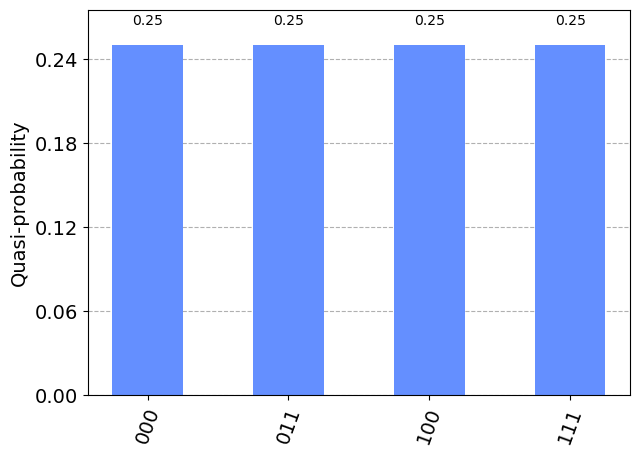

In [106]:
plot_histogram(counts)

In [107]:
# Ainsi, on observe les quatre possibilités offertes par le système (000, 011, 100, 111) et les probabilités
# d'obtenir l'une ou l'autre des possibilités (25% de chances pour chaque probabilité lors de la première 
# exécution du calcul quantique)